# Import Data

For this purpose, this strategy will attemp to trade 3 instruments
1. GBPUSD h4 - Liquid, Extreme Volatility
1. GBPUSD d1 - Liquid, High Volatility
2. AUDUSD h4 - Liquid, Medium Volatility
2. AUDUSD d1 - Liquid, Low Volatility
3. Wirdcard d1 - Illiquid, High Volatility

In [60]:
import numpy as np
import pandas as pd

amex_df = pd.read_csv('../../data/gen/usAXP_df.csv',
                           parse_dates=True,
                           index_col=0)
# Strip whitespace from column names
amex_df.columns = amex_df.columns.str.strip()
# Print 
amex_df.head()


,close,high,low,p_change,open,pre_close,volume,date,date_week,atr21,atr14,key
2017-06-12,80.17,80.73,79.95,-0.174,80.35,80.31,3352279,20170612,0,0.780000,0.780000,0
2017-06-13,80.59,80.74,80.07,0.524,80.20,80.17,3174361,20170613,1,0.722381,0.721071,1
2017-06-14,80.84,80.92,79.62,0.310,80.11,80.59,4013089,20170614,2,0.933535,0.942224,2
2017-06-15,80.70,81.24,80.23,-0.173,80.38,80.84,2773369,20170615,3,0.955464,0.962959,3
2017-06-16,81.45,81.48,80.77,0.929,80.86,80.70,5914676,20170616,4,0.896598,0.896962,4



## Processing Data


In [61]:

x_days = 10 # The number of days to calculate moving_average & moving_std.
std_mutiplier = 0.5 # The multiplier for moving standard deviation.

extra_df = amex_df.copy()
extra_df['ma'] = extra_df['close'].rolling(window=x_days, 
                                           center=False).mean()
extra_df['mov_std'] = extra_df['close'].rolling(window=x_days, 
                                                center=False).std() * np.sqrt(x_days)
extra_df['ewm_std'] = extra_df['close'].ewm(span=20,
                                            min_periods=20,
                                            adjust=True).std() * np.sqrt(20)
extra_df['m+{}std'.format(std_mutiplier)] = extra_df['ma'] + std_mutiplier * extra_df['mov_std']
extra_df['m-{}std'.format(std_mutiplier)] = extra_df['ma'] - std_mutiplier * extra_df['mov_std']


## Plotting Data

Plot the close price and the price change probability distribution

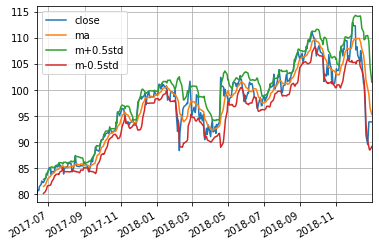

In [62]:
             
extra_df[['close', 
          'ma',
          'm+{}std'.format(std_mutiplier), 
          'm-{}std'.format(std_mutiplier)]].plot(subplots=False, 
                                                 grid=True
)

# Initialize Strategy 

Let's create a strategy which will 
- Buy the stock when it's 2 `moving_std` above `moving_average`, and close at `moving_average`.
- Sell the stock when it's 2 `moving_std` below `moving_average`, and close at `moving_average`.


In [63]:
import import_ipynb
from strategy_3 import TradeStrategy3

strategy = TradeStrategy3(std_mutiplier=std_mutiplier,
                          x_days=x_days,
                          should_log=True, 
                          should_plot=False)


# Testing Strategy 

We will iterate through all trade days, and let strategy decide whether or not it should buy/sell.

Finally, we will print the strategy of the result.

In [64]:
for date, trade_day in extra_df.iterrows():
    strategy.trade(date=date,
                   tradeday=trade_day)
print("Strategy3 Yielded: {}% with x_days: {}, std_mutiplier: {}.".format(round(strategy.trade_profit*100, 2), x_days, std_mutiplier))

Sold on 2017-06-29 00:00:00 at $83.63.
- Closed on 2017-06-30 00:00:00 at $84.24.
Sold on 2017-07-05 00:00:00 at $84.89.
- Closed on 2017-07-06 00:00:00 at $83.74.
Sold on 2017-07-25 00:00:00 at $85.41.
- Closed on 2017-07-31 00:00:00 at $85.23.
Sold on 2017-08-17 00:00:00 at $86.09.
- Closed on 2017-08-30 00:00:00 at $85.69.
Sold on 2017-08-31 00:00:00 at $86.1.
- Closed on 2017-09-01 00:00:00 at $86.14.
Sold on 2017-09-01 00:00:00 at $86.14.
- Closed on 2017-09-11 00:00:00 at $85.7.
Sold on 2017-09-20 00:00:00 at $88.43.
- Closed on 2017-09-21 00:00:00 at $88.44.
Sold on 2017-10-04 00:00:00 at $90.99.
- Closed on 2017-10-05 00:00:00 at $91.16.
Sold on 2017-10-16 00:00:00 at $91.96.
- Closed on 2017-10-18 00:00:00 at $92.03.
Bought on 2017-10-19 00:00:00 at $91.9.
- Closed on 2017-11-07 00:00:00 at $95.37.
Bought on 2017-11-13 00:00:00 at $93.9.
- Closed on 2017-11-14 00:00:00 at $93.76.
Sold on 2017-11-22 00:00:00 at $93.82.
- Closed on 2017-11-28 00:00:00 at $95.28.
Sold on 2017-11-